# Building an Image Classifier from Scratch _ Lab
## Pradeep Reddy Oruganti

The main goal of this lab is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

**Grading:** 

50% of the grade will come from error-free code that accomplishes all the steps outlined in the instructions for each part of this lab and written in Python/Keras. The other 50% will come from the comments associated with that code, where the comments explain what the code is doing and why it is important to the overall objective. Thus, comments like "split the data" or "train the model" would receive a grade of 0 as they do not indicate any understanding.

**Research Required:** 

To complete this lab successfully you will need to some research. At the very least, you will need to implement the `ImageDataGenerator` class and the `.flow_from_directory` methods that can be reviewed in the [Keras documentation](https://keras.io/api/preprocessing/#image-data-preprocessing). You may also find it helpful to use `os` package (which you already have installed) as that let's you work with files and folders similar to using the command line interface (use `import os` to get access to these commands). For example, to get your current working directory you would use: 
```python
import os

os.getcwd()
```

**What to submit:**
- A copy of this notebook with:
    - Error-free code in Python/Keras
    - All code cells executed and output visible
- Include a zipped file of your images



## Part 1: Prep Work
### Choose an Object

You may choose any object other than a cat. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset. 

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways. 

You will then need to organize your dataset into folders so the images can be read directly from a Jupyter notebook. 

## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

You should then use the training data generator to print out some examples of the training images and corresponding labels. (`matplotlib` should work for this and the fact that an image data generator has a `.next()` method.) 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. It may be helpful to use `batch_size=1` for this step. 

In [ ]:
# import classes and functions 


from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam,SGD
from keras.layers import MaxPooling2D,Dropout, Flatten,Conv2D
from keras.utils import np_utils
from PIL import Image
import os,sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from array import array
import numpy as np 
from scipy import misc,ndimage
import matplotlib.pyplot as plot
np.random.seed(1)  #for reproducibility 

from tensorflow.keras.preprocessing import image


In [ ]:
os.getcwd()

'C:\\Users\\Charan\\Desktop\\DAB300\\LABS\\Lab 3'

In [ ]:
# Training & Testing Data
row,column = 148,148

In [ ]:
Train_Data_Car_path = 'Dataset folder/train/car'
Train_Data_Not_car_path = 'Dataset folder/train/Not_car'

val_Data_Car_path = 'Dataset folder/val/car'
val_Data_Not_car_path = 'Dataset folder/val/Not_car'


Test_Data_Car_path = 'Dataset folder/test/car'
Test_Data_Not_Car_path = 'Dataset folder/test/Not_car'

In [ ]:
# Source :https://www.tutorialspoint.com/python/os_walk.htm


train_files = sum([len(files) for r, d, files in os.walk("C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train")])
val_files = sum([len(files) for r, d, files in os.walk("C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/val")])
test_files = sum([len(files) for r, d, files in os.walk("C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/test")])



print("Number of images in Train folder : {}".format(train_files))
print("Number of images in Validation folder : {}".format(val_files))
print("Number of images in Test folder : {}".format(test_files))

Number of images in Train folder : 100
Number of images in Validation folder : 30
Number of images in Test folder : 60


In [ ]:
# create a matrix to flatten all the values

X_train = []
Y_train = []

X_val =[]
Y_val=[]

X_test =[]
Y_test= []


classes = 2 

In [ ]:
listingCar = os.listdir(Train_Data_Car_path)
for file in listingCar:    
    img = Image.open(Train_Data_Car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_train.append(x)
    Y_train.append(1) # CAR 

In [ ]:
#X_train

In [ ]:
listingCar = os.listdir(Train_Data_Not_car_path)
for file in listingCar:    
    img = Image.open(Train_Data_Not_car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_train.append(x)
    Y_train.append(0) #Not_CAR 

In [ ]:
#X_train

In [ ]:
print('X_Train dats size is : {}'.format(len(X_train)))

print('Y_Train dats size is : {}'.format(len(Y_train)))

X_Train dats size is : 100
Y_Train dats size is : 100


In [ ]:
#Y_train

In [ ]:
os.getcwd()

'C:\\Users\\Charan\\Desktop\\DAB300\\LABS\\Lab 3'

In [ ]:
listingCar_val = os.listdir(val_Data_Car_path)
for file in listingCar_val:
    img = Image.open(val_Data_Car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_val.append(x)
    Y_val.append(1) #CAR 


In [ ]:
listing_NOT_Car_val = os.listdir(val_Data_Not_car_path)
for file in listing_NOT_Car_val:
    img = Image.open(val_Data_Not_car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_val.append(x)
    Y_val.append(0) #Not_CAR 

In [ ]:
#Y_val

In [ ]:
listingCar_test = os.listdir(Test_Data_Car_path)
for file in listingCar_test:    
    img = Image.open(Test_Data_Car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_test.append(x)
    Y_test.append(1) # CAR 

In [ ]:
listing_NOTCar_test = os.listdir(Test_Data_Not_Car_path)
for file in listing_NOTCar_test:    
    img = Image.open(Test_Data_Not_Car_path+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_test.append(x)
    Y_test.append(0) # Not_CAR 

In [ ]:
print('X_Test dats size is : {}'.format(len(X_test)))

print('y_Test dats size is : {}'.format(len(Y_test)))

X_Test dats size is : 30
y_Test dats size is : 30


In [ ]:
#X_test[0:15]

In [ ]:
#a = np.arange(100).reshape((50, 2))
#a


In [ ]:
#a.reshape(100 , 1)  

In [ ]:
# ......................... Train Data Reshaping .......................
total_input = len(X_train)
print("Total Train Data : %d" %total_input)

X_train = np.array(X_train)
X_train = X_train.reshape(total_input, row, column, 3) 
X_train = X_train.astype('float32')     
X_train /= 255 
Y_train = np.array(Y_train)   
Y_train = Y_train.reshape(total_input, 1)   


print("X_train shape")
print(X_train.shape)
print("Y_train Shape")
print(Y_train.shape)

Total Train Data : 100
X_train shape
(100, 148, 148, 3)
Y_train Shape
(100, 1)


In [ ]:
#Y_val

In [ ]:
total_input_val = len(X_val)
print("Total validation Data : %d" %total_input_val)

X_val = np.array(X_val)
X_val = X_val.reshape(total_input_val, row, column, 3)
X_val = X_val.astype('float32')     
X_val /= 255


Y_val = np.array(Y_val)   
Y_val = Y_val.reshape(total_input_val, 1)   

print("X_val shape")
print(X_val.shape)
print("Y_val Shape")
print(Y_val.shape)

Total validation Data : 30
X_val shape
(30, 148, 148, 3)
Y_val Shape
(30, 1)


In [ ]:
len(Y_test)

30

In [ ]:
total_input_test = len(X_test)
print("Total Test Data : %d" %total_input_val)

X_test = np.array(X_test)
X_test = X_test.reshape(total_input_test, row, column, 3)
X_test = X_test.astype('float32')     
X_test /= 255


Y_test = np.array(Y_test)   
Y_test = Y_test.reshape(total_input_test, 1)   

print("X_test shape")
print(X_test.shape)
print("Y_test Shape")
print(Y_test.shape)

Total Test Data : 30
X_test shape
(30, 148, 148, 3)
Y_test Shape
(30, 1)


In [ ]:
#X_test

In [ ]:
len(Y_test)

30

In [ ]:
np.random.seed(2)

a = np.random.randint(low=1, high=100, size=4)
a

array([41, 16, 73, 23])

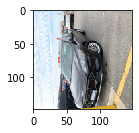

Label for above Image is : [1]


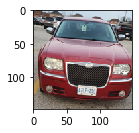

Label for above Image is : [1]


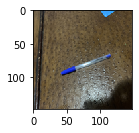

Label for above Image is : [0]


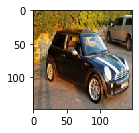

Label for above Image is : [1]


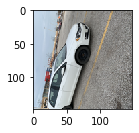

Label for above Image is : [1]


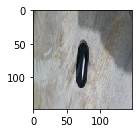

Label for above Image is : [0]


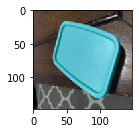

Label for above Image is : [0]


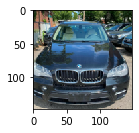

Label for above Image is : [1]


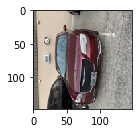

Label for above Image is : [1]


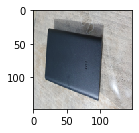

Label for above Image is : [0]


In [ ]:
 #................................. Plot Car in MatLab .....................

np.random.seed(2)

a = np.random.randint(low=1, high=100, size=10) 

for i in a:
    plot.subplot(221)
    plot.imshow(X_train[i])

    plot.show()
    print('Label for above Image is : {}'.format(Y_train[i]))


In [ ]:
type(Y_train[20])

numpy.ndarray

In [ ]:
'''# It's a binary-class problem, output is 1 (CAR) and 0(NOT CAR). it's a good practice to use "one hot encoding" to class values 

print(len(Y_train))


Y_train = np_utils.to_categorical(Y_train, classes) 
Y_val = np_utils.to_categorical(Y_val,classes)
Y_test = np_utils.to_categorical(Y_test, classes)  

'''

'# It\'s a binary-class problem, output is 1 (CAR) and 0(NOT CAR). it\'s a good practice to use "one hot encoding" to class values \n\nprint(len(Y_train))\n\n\nY_train = np_utils.to_categorical(Y_train, classes) \nY_val = np_utils.to_categorical(Y_val,classes)\nY_test = np_utils.to_categorical(Y_test, classes)  \n\n'

In [ ]:
#Build the model
model = Sequential() 
model.add(Conv2D(6, (3, 3), activation='relu',input_shape=(148,148, 3),kernel_initializer='he_uniform')) # 32 convolutional filter with size (2,2)

model.add(Conv2D(12, (3, 3),activation='relu'))  
#model.add(Dropout(0.2))

model.add(Conv2D(18, (3, 3),activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2))) # filter size (2,2)
model.add(Dropout(0.5))  # Drop out is used for avoiding data overfitting by reducing the NN branches. 


model.add(Flatten())
  
model.add(Dense(30,activation='relu'))       
model.add(Dense(1,activation='sigmoid')) 



In [ ]:
#Y_train

In [ ]:
# Define Loss & compile model 


#opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam') 
# optimizer - "rmsprop"/"sgd"/"adadelta" , loss - "binary_crossentropy" / "categorical_crossentropy"

# fit the model 

model.fit(X_train, Y_train, batch_size=1, epochs=15, validation_data= (X_val,Y_val), verbose=1)

Train on 100 samples, validate on 30 samples
Epoch 1/15
100/100 [==============================] - 4s 45ms/step - loss: 0.8501 - accuracy: 0.5600 - val_loss: 0.6036 - val_accuracy: 0.6667
Epoch 2/15
100/100 [==============================] - 4s 45ms/step - loss: 0.4354 - accuracy: 0.8200 - val_loss: 1.1193 - val_accuracy: 0.4667
Epoch 3/15
100/100 [==============================] - 5s 52ms/step - loss: 0.3070 - accuracy: 0.8700 - val_loss: 0.7584 - val_accuracy: 0.6333
Epoch 4/15
100/100 [==============================] - 5s 50ms/step - loss: 0.1423 - accuracy: 0.9700 - val_loss: 0.7880 - val_accuracy: 0.6333
Epoch 5/15
100/100 [==============================] - 4s 44ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 1.0703 - val_accuracy: 0.7000
Epoch 6/15
100/100 [==============================] - 4s 45ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.4273 - val_accuracy: 0.5667
Epoch 7/15
100/100 [==============================] - 5s 48ms/step - loss: 0.0051 - accuracy: 1.0

In [ ]:
# Test 
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1]) 

30/30 [==============================] - 0s 3ms/step

Test accuracy: 0.6000000238418579


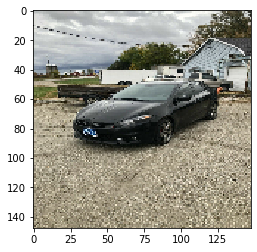

It is NOT a CAR 
 --------------------------------


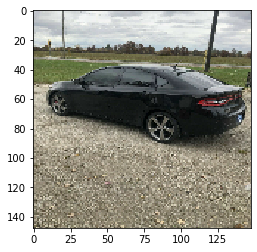

It is NOT a CAR 
 --------------------------------


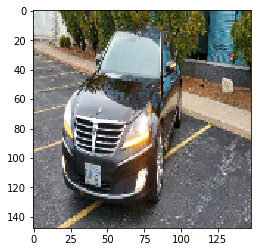

It is a CAR 
 --------------------------------


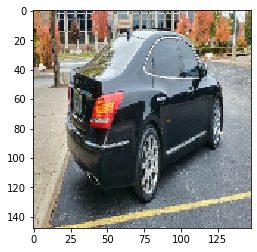

It is a CAR 
 --------------------------------


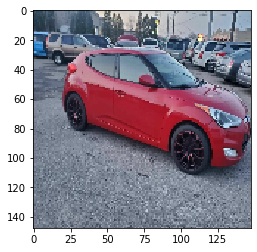

It is NOT a CAR 
 --------------------------------


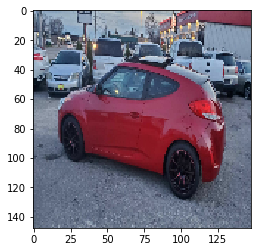

It is a CAR 
 --------------------------------


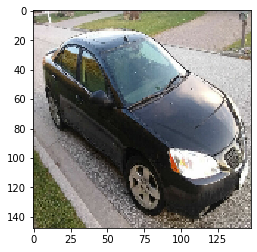

It is a CAR 
 --------------------------------


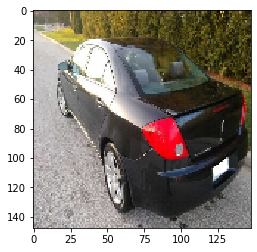

It is a CAR 
 --------------------------------


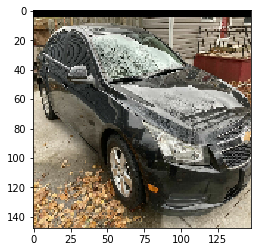

It is a CAR 
 --------------------------------


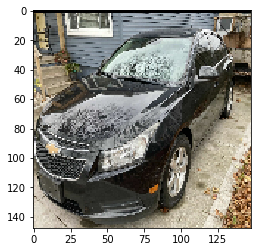

It is a CAR 
 --------------------------------


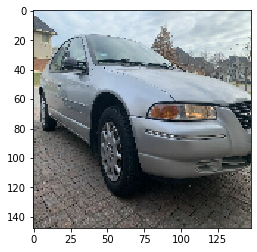

It is NOT a CAR 
 --------------------------------


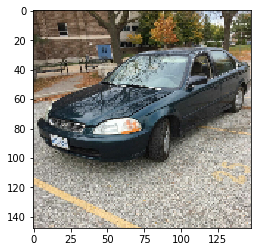

It is a CAR 
 --------------------------------


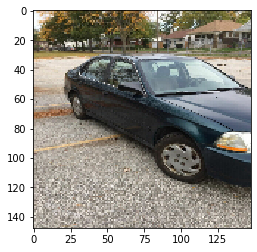

It is NOT a CAR 
 --------------------------------


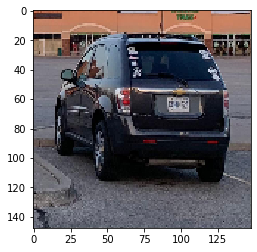

It is a CAR 
 --------------------------------


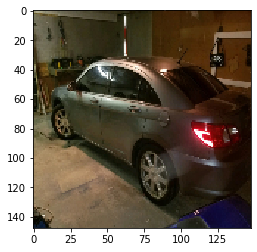

It is NOT a CAR 
 --------------------------------


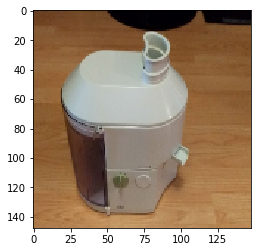

It is NOT a CAR 
 --------------------------------


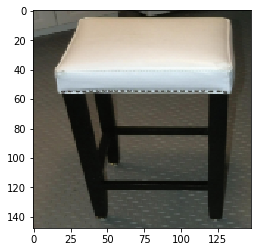

It is NOT a CAR 
 --------------------------------


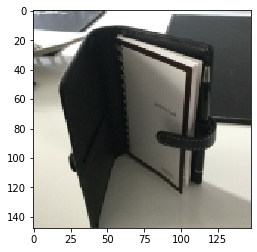

It is a CAR 
 --------------------------------


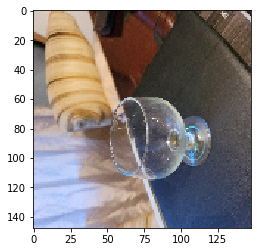

It is NOT a CAR 
 --------------------------------


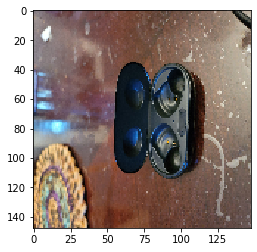

It is NOT a CAR 
 --------------------------------


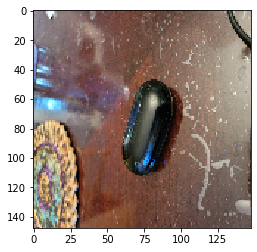

It is NOT a CAR 
 --------------------------------


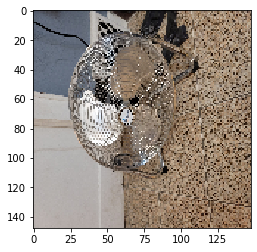

It is NOT a CAR 
 --------------------------------


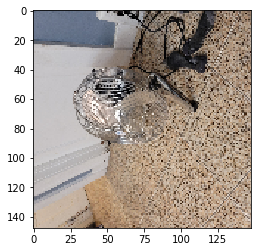

It is NOT a CAR 
 --------------------------------


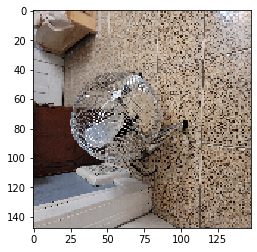

It is NOT a CAR 
 --------------------------------


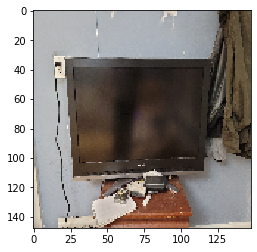

It is a CAR 
 --------------------------------


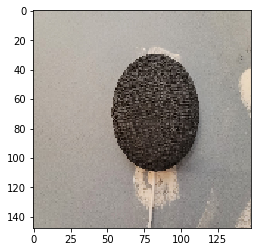

It is NOT a CAR 
 --------------------------------


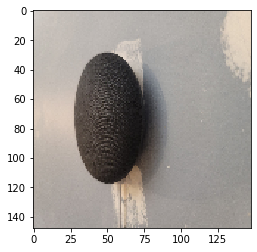

It is a CAR 
 --------------------------------


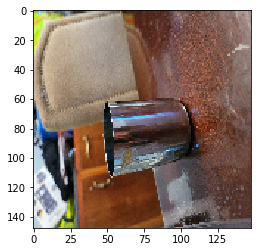

It is a CAR 
 --------------------------------


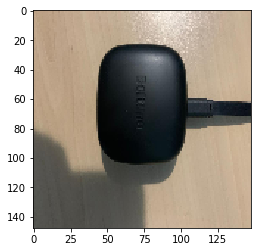

It is NOT a CAR 
 --------------------------------


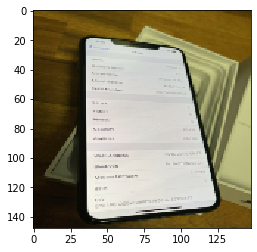

It is a CAR 
 --------------------------------


In [ ]:
datasetpath = 'C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/dataset folder/test_all'
directories = os.listdir(datasetpath)
for label in directories:
    img = image.load_img(datasetpath+ '/' + label , target_size=(148, 148))
   
    plot.imshow(img)
    plot.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

 

    classes =model.predict(images)
    #print(classes)
    if classes == 1:
        print("It is a CAR \n --------------------------------")
    else:
        print("It is NOT a CAR \n --------------------------------")

### Using ImageDataGenerators

In [ ]:
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Activation,Dropout
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam,RMSprop
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image


In [ ]:
train_path_dir = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train"
validation_path_dir= "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/val"
test_path_dir= "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/test"

train_files = sum([len(files) for r, d, files in os.walk(train_path_dir)])
val_files = sum([len(files) for r, d, files in os.walk(validation_path_dir)])
test_files = sum([len(files) for r, d, files in os.walk(test_path_dir)])



print("Number of images in Train folder : {}".format(train_files))
print("Number of images in Validation folder : {}".format(val_files))
print("Number of images in Test folder : {}".format(test_files))

Number of images in Train folder : 100
Number of images in Validation folder : 30
Number of images in Test folder : 30


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [ ]:

train_generator = train_datagen.flow_from_directory(train_path_dir,
                                                   target_size=(148,148),
                                                   batch_size=2,
                                                   class_mode='binary')



validation_generator = validation_datagen.flow_from_directory(validation_path_dir,
                                                   target_size=(148,148),
                                                   batch_size=1,
                                                   class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_path_dir,
                                                  target_size=(148,148),
                                                  batch_size=1,
                                                  class_mode='binary')

Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)


{'Not_car': 0, 'car': 1}
{'Not_car': 0, 'car': 1}
{'Not_car': 0, 'car': 1}


In [ ]:
# plots images with labels within jupyter notebook
def plotImages(images_arr):
    fid,axes = plt.subplots(1,2,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

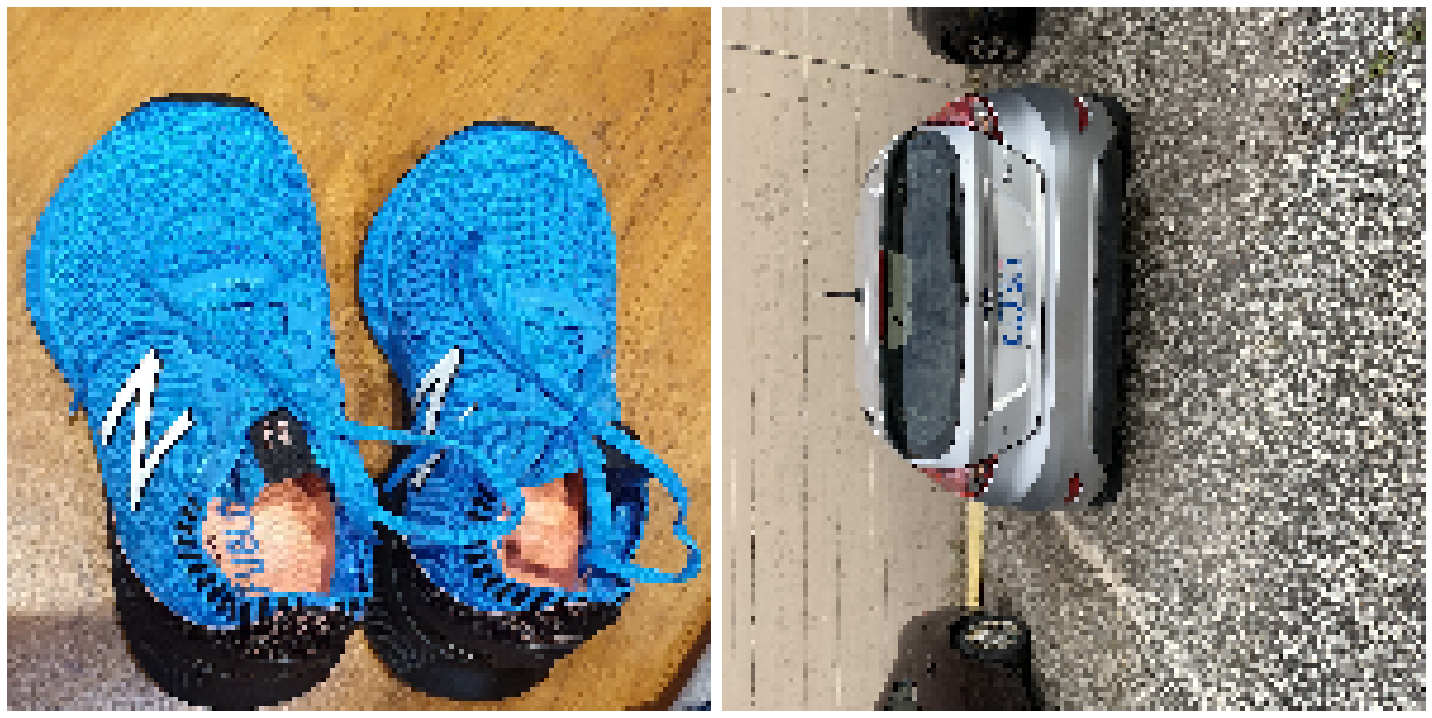

[0. 1.]


In [ ]:
imgs,labels = next(train_generator)

plotImages(imgs)
print(labels)

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(4, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',input_shape=(148,148,3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model_1.add(Dropout(0.5)) # 50% of neurons will be in dead state during trainng phase


model_1.add(Conv2D(8,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
#model_1.add(Dropout(0.2))


model_1.add(Conv2D(12,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
#model_1.add(Dropout(0.2))
model_1.add(BatchNormalization())




#model_1.add(Conv2D(24,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
#model_1.add(Dropout(0.2))

model_1.add(Flatten())

#model_1.add(Dense(512, activation='relu'))
#model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(20, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))



model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model_1.fit(
      train_generator,  
      epochs=15,
      validation_data = validation_generator)

Epoch 1/15
50/50 [==============================] - 4s 83ms/step - loss: 0.9372 - accuracy: 0.7500 - val_loss: 0.0018 - val_accuracy: 0.5000
Epoch 2/15
50/50 [==============================] - 4s 83ms/step - loss: 0.1725 - accuracy: 0.9400 - val_loss: 1.2909 - val_accuracy: 0.7667
Epoch 3/15
50/50 [==============================] - 4s 79ms/step - loss: 0.1489 - accuracy: 0.9300 - val_loss: 2.1432 - val_accuracy: 0.7333
Epoch 4/15
50/50 [==============================] - 4s 78ms/step - loss: 0.0454 - accuracy: 0.9900 - val_loss: 0.8727 - val_accuracy: 0.6333
Epoch 5/15
50/50 [==============================] - 4s 78ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.7000
Epoch 6/15
50/50 [==============================] - 4s 83ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.6324e-04 - val_accuracy: 0.7000
Epoch 7/15
50/50 [==============================] - 4s 79ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.7000
Epoch 8/1

In [ ]:
# Test 
score_1 = model_1.evaluate(test_generator, verbose=1)
print('\n''Test accuracy:', score_1[1]) 

30/30 [==============================] - 1s 41ms/step

Test accuracy: 0.6333333253860474


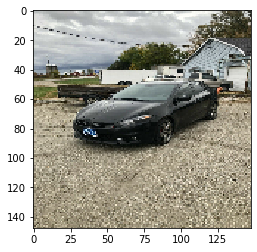

It is NOT a CAR 
 --------------------------------


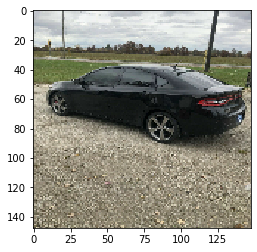

It is NOT a CAR 
 --------------------------------


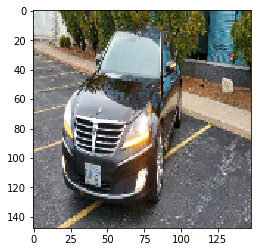

It is a CAR 
 --------------------------------


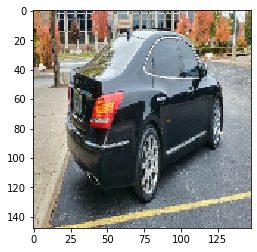

It is a CAR 
 --------------------------------


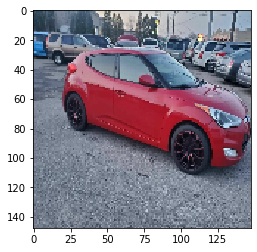

It is NOT a CAR 
 --------------------------------


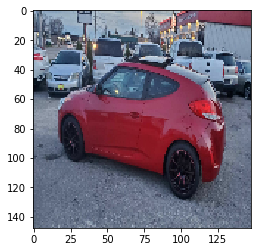

It is a CAR 
 --------------------------------


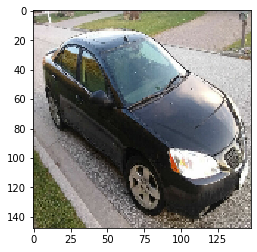

It is NOT a CAR 
 --------------------------------


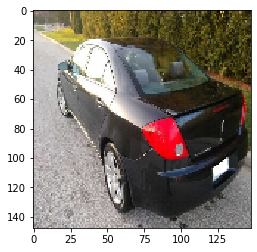

It is a CAR 
 --------------------------------


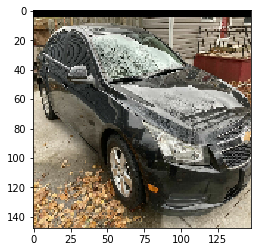

It is a CAR 
 --------------------------------


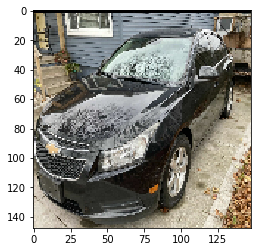

It is a CAR 
 --------------------------------


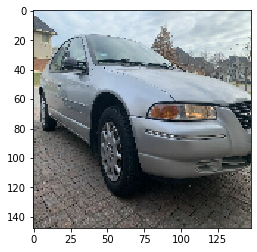

It is a CAR 
 --------------------------------


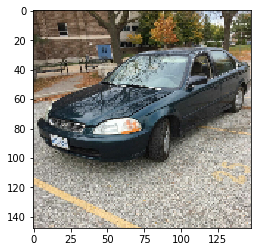

It is NOT a CAR 
 --------------------------------


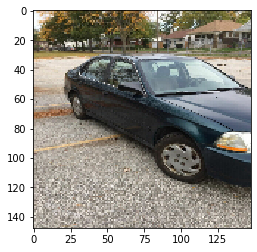

It is NOT a CAR 
 --------------------------------


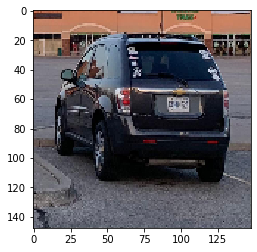

It is a CAR 
 --------------------------------


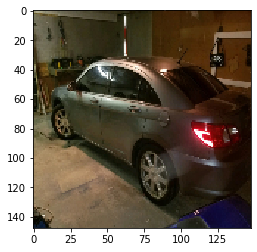

It is NOT a CAR 
 --------------------------------


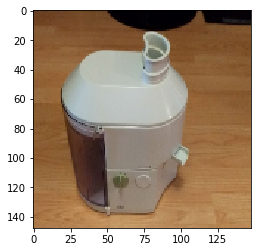

It is NOT a CAR 
 --------------------------------


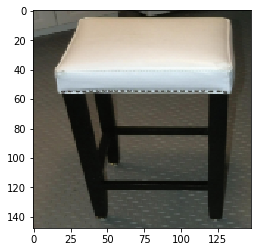

It is NOT a CAR 
 --------------------------------


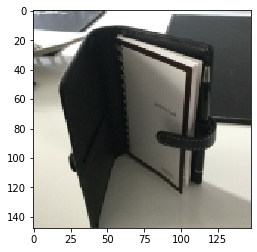

It is a CAR 
 --------------------------------


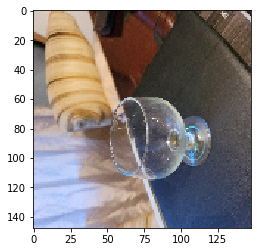

It is NOT a CAR 
 --------------------------------


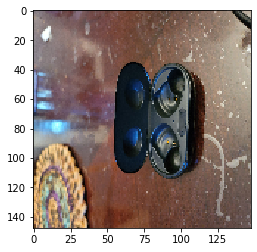

It is NOT a CAR 
 --------------------------------


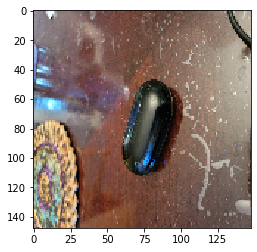

It is NOT a CAR 
 --------------------------------


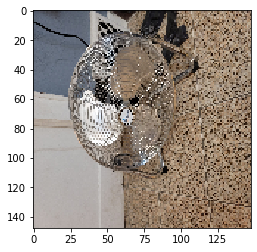

It is a CAR 
 --------------------------------


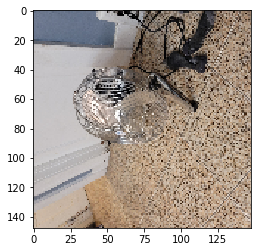

It is NOT a CAR 
 --------------------------------


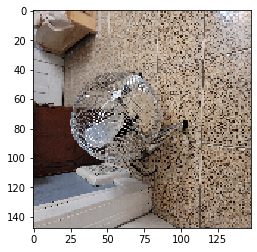

It is a CAR 
 --------------------------------


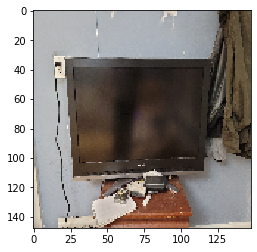

It is NOT a CAR 
 --------------------------------


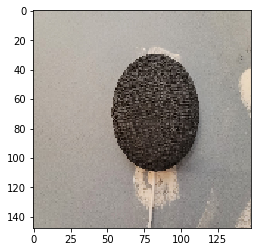

It is NOT a CAR 
 --------------------------------


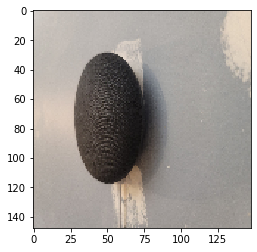

It is NOT a CAR 
 --------------------------------


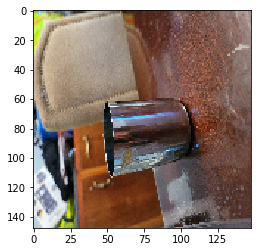

It is a CAR 
 --------------------------------


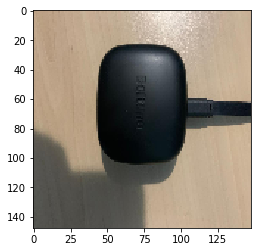

It is NOT a CAR 
 --------------------------------


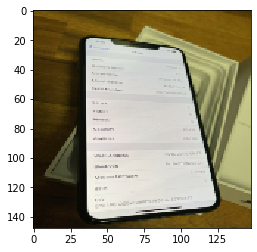

It is NOT a CAR 
 --------------------------------


In [ ]:
datasetpath = 'C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/dataset folder/test_all'
directories = os.listdir(datasetpath)
for label in directories:
    img = image.load_img(datasetpath+ '/' + label , target_size=(148, 148))
   
    plot.imshow(img)
    plot.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

 

    classes =model_1.predict(images)
    #print(classes)
    if classes > 0.5:
        print("It is a CAR \n --------------------------------")
    else:
        print("It is NOT a CAR \n --------------------------------")

## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

You should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and `.flow()` methods may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. It may be helpful to use `batch_size=1` for this step. 

In [ ]:
 
#ImageDataGenerator for generating more images

img_path= "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train/car/car.0.png"

datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

image1= load_img(img_path,target_size=(row,column))

x=img_to_array(image1)

x= x.reshape((1,)+ x.shape)

# iterator
aug_iter = datagen.flow(x, batch_size=1)






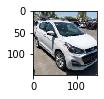

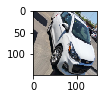

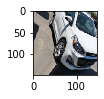

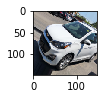

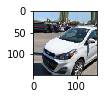

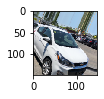

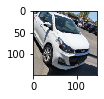

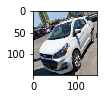

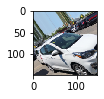

In [ ]:
# Source code for below plot: 
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

for i in range(9):
    # define subplot
    plot.subplot(330 + 1 + i)
    # generate batch of images
    batch = aug_iter.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype(np.uint8)
    # plot raw pixel data
    plot.imshow(image)  
    # show the figure
    plot.show()
    

In [ ]:
i=0

for batch in datagen.flow(x,batch_size=1,save_to_dir='C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/d1',
                          save_prefix='car',save_format='png'):
    i +=1
    
    if i>20:
        break

In [ ]:
dirr = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train/car"

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

### Generating Augmented images of cars in train folder

In [ ]:
dirr_car = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train/car"

for x in os.listdir(dirr_car):
    img_path= dirr_car + '/'+ x
    #print(img_path)
    image1= load_img(img_path,target_size=(row,column))
    x=img_to_array(image1)

    x= x.reshape((1,)+ x.shape)

    # iterator
    aug_iter = datagen.flow(x, batch_size=1)
    i=0

    for batch in datagen.flow(x,batch_size=1,save_to_dir='C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/car',
                          save_prefix='car',save_format='png'):
        i +=1

        if i>25:
            break


### Generating Augmented images of other Objects (Not_cars) in train folder

In [ ]:
dirr = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/train/Not_car"

for x in os.listdir(dirr):
    img_path= dirr + '/'+ x
    #print(img_path)
    image1= load_img(img_path,target_size=(row,column))
    x=img_to_array(image1)

    x= x.reshape((1,)+ x.shape)

    # iterator
    aug_iter = datagen.flow(x, batch_size=1)
    i=0

    for batch in datagen.flow(x,batch_size=1,save_to_dir='C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/Not_car',
                          save_prefix='Not_car',save_format='png'):
        i +=1

        if i>25:
            break

In [ ]:
print("After Data Augmentation on Both cars and other objects we have below number of images in Train set : ")

Augmented_train_files_cars = sum([len(files) for r, d, files in os.walk("C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/car")])

Augmented_train_files_Not_cars = sum([len(files) for r, d, files in os.walk("C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/Not_car")])


print("\n Number of images in Train  cars folder : {}".format(Augmented_train_files_cars))
print("\n Number of images in Train  cars folder : {}".format(Augmented_train_files_Not_cars))

After Data Augmentation on Both cars and other objects we have below number of images in Train set : 

 Number of images in Train  cars folder : 1244

 Number of images in Train  cars folder : 1224


## Creating Augmented Images for Validation folder

In [ ]:
dirr_car_val = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/val/car"

for x in os.listdir(dirr_car_val):
    img_path= dirr_car_val + '/'+ x
    #print(img_path)
    image1= load_img(img_path,target_size=(row,column))
    x=img_to_array(image1)

    x= x.reshape((1,)+ x.shape)

    # iterator
    aug_iter = datagen.flow(x, batch_size=1)
    i=0

    for batch in datagen.flow(x,batch_size=1,save_to_dir='C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_val/car',
                          save_prefix='car',save_format='png'):
        i +=1

        if i>25:
            break
            
            
            
dirr_not_cal_val = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/val/Not_car"

for x in os.listdir(dirr_not_cal_val):
    img_path= dirr_not_cal_val + '/'+ x
    #print(img_path)
    image1= load_img(img_path,target_size=(row,column))
    x=img_to_array(image1)

    x= x.reshape((1,)+ x.shape)

    # iterator
    aug_iter = datagen.flow(x, batch_size=1)
    i=0

    for batch in datagen.flow(x,batch_size=1,save_to_dir='C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_val/Not_car',
                          save_prefix='Not_car',save_format='png'):
        i +=1

        if i>25:
            break

In [ ]:

train_aug_path = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train"

val_aug_path = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_val"

Aug_train_generator = train_datagen.flow_from_directory(train_aug_path,
                                                   target_size=(148,148),
                                                   batch_size=8,
                                                   class_mode='binary')



Aug_validation_generator = validation_datagen.flow_from_directory(val_aug_path,
                                                   target_size=(148,148),
                                                   batch_size=1,
                                                   class_mode='binary')


Aug_test_generator = test_datagen.flow_from_directory(test_path_dir,
                                                  target_size=(148,148),
                                                  batch_size=1,
                                                  class_mode='binary')

Found 2468 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


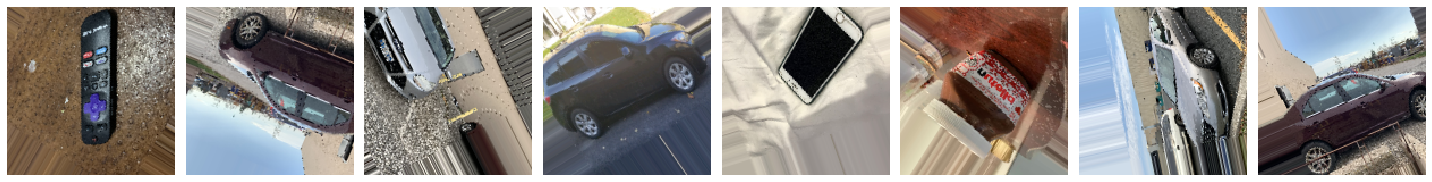

[0. 1. 1. 1. 0. 0. 1. 1.]


In [ ]:
# plots images with labels within jupyter notebook
def plotImages(images_arr):
    fid,axes = plt.subplots(1,8,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
imgs,labels = next(Aug_train_generator)

plotImages(imgs)
print(labels)

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',input_shape=(148,148,3)))
model_2.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))



model_2.add(Conv2D(64,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.5))

model_2.add(Conv2D(128,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_2.add(Conv2D(128,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))         
model_2.add(Dropout(0.2))
            
            
model_2.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model_2.add(Conv2D(32,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
            
            
model_2.add(BatchNormalization())



model_2.add(Flatten())


model_2.add(Dense(20, activation='relu'))

model_2.add(Dense(1, activation='sigmoid'))



model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history_2 = model_2.fit(
      Aug_train_generator,  
      epochs=15,
      validation_data = Aug_validation_generator)

Epoch 1/15
309/309 [==============================] - 158s 510ms/step - loss: 0.6225 - accuracy: 0.7042 - val_loss: 0.0047 - val_accuracy: 0.6073
Epoch 2/15
309/309 [==============================] - 157s 509ms/step - loss: 0.3886 - accuracy: 0.8391 - val_loss: 3.4585 - val_accuracy: 0.7840
Epoch 3/15
309/309 [==============================] - 161s 520ms/step - loss: 0.3190 - accuracy: 0.8691 - val_loss: 0.0363 - val_accuracy: 0.8312
Epoch 4/15
309/309 [==============================] - 162s 524ms/step - loss: 0.3064 - accuracy: 0.8825 - val_loss: 0.0701 - val_accuracy: 0.8469
Epoch 5/15
309/309 [==============================] - 159s 515ms/step - loss: 0.2639 - accuracy: 0.8987 - val_loss: 0.8990 - val_accuracy: 0.7853
Epoch 6/15
309/309 [==============================] - 150s 484ms/step - loss: 0.2451 - accuracy: 0.9028 - val_loss: 0.0721 - val_accuracy: 0.7291
Epoch 7/15
309/309 [==============================] - 157s 510ms/step - loss: 0.2340 - accuracy: 0.9109 - val_loss: 8.1508e-

In [ ]:
# Test 
score_2 = model_2.evaluate(test_generator, verbose=1)
print('\n''Test accuracy:', score_2[1]) 

30/30 [==============================] - 3s 100ms/step

Test accuracy: 0.800000011920929


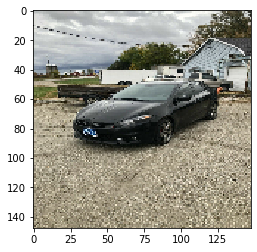

It is a CAR 
 --------------------------------


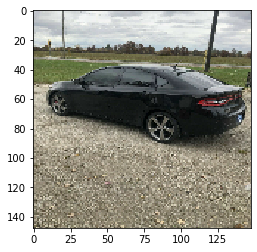

It is a CAR 
 --------------------------------


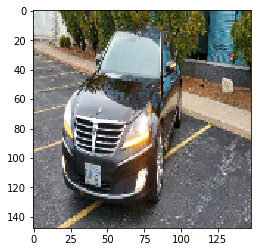

It is a CAR 
 --------------------------------


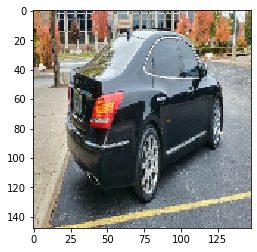

It is a CAR 
 --------------------------------


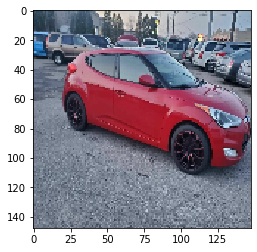

It is a CAR 
 --------------------------------


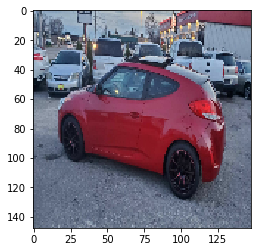

It is a CAR 
 --------------------------------


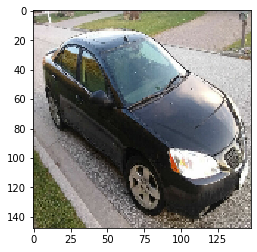

It is a CAR 
 --------------------------------


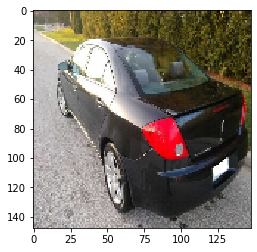

It is a CAR 
 --------------------------------


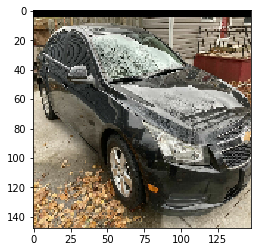

It is a CAR 
 --------------------------------


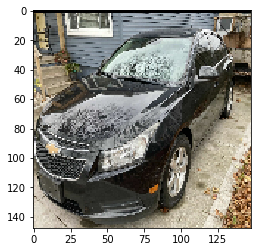

It is a CAR 
 --------------------------------


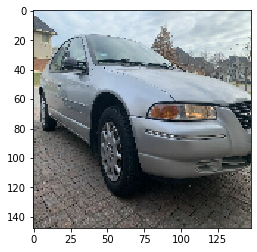

It is a CAR 
 --------------------------------


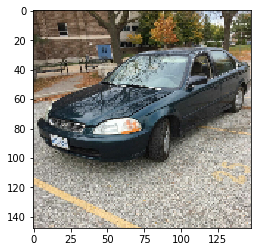

It is a CAR 
 --------------------------------


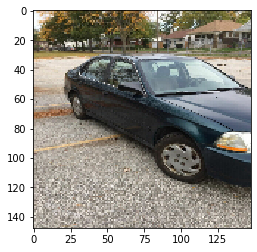

It is a CAR 
 --------------------------------


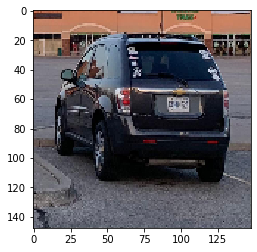

It is a CAR 
 --------------------------------


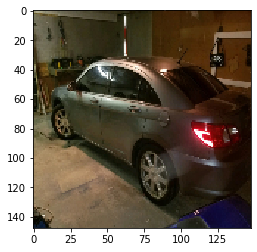

It is a CAR 
 --------------------------------


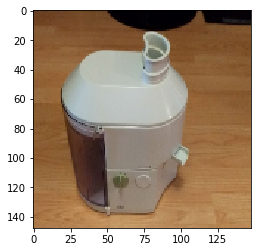

It is NOT a CAR 
 --------------------------------


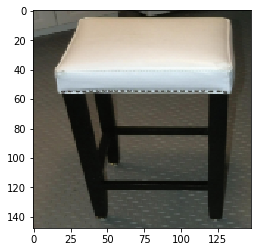

It is NOT a CAR 
 --------------------------------


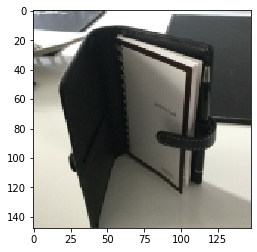

It is a CAR 
 --------------------------------


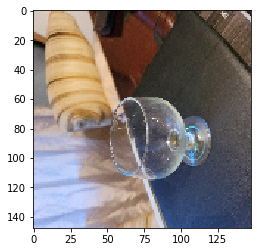

It is a CAR 
 --------------------------------


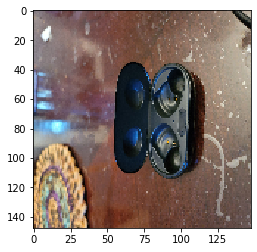

It is NOT a CAR 
 --------------------------------


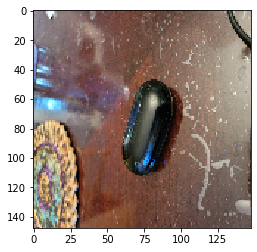

It is NOT a CAR 
 --------------------------------


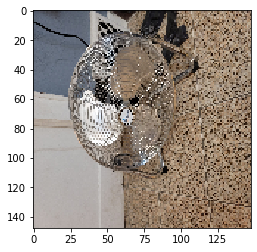

It is a CAR 
 --------------------------------


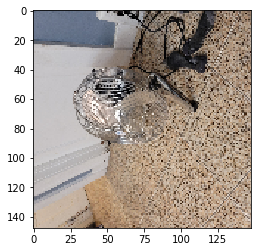

It is a CAR 
 --------------------------------


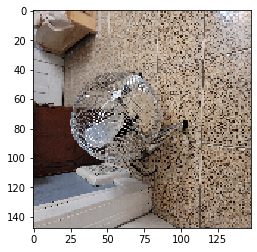

It is a CAR 
 --------------------------------


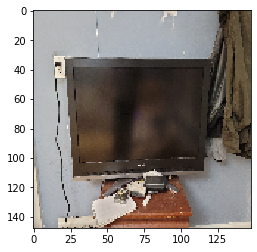

It is a CAR 
 --------------------------------


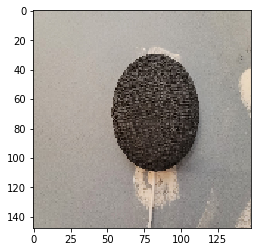

It is NOT a CAR 
 --------------------------------


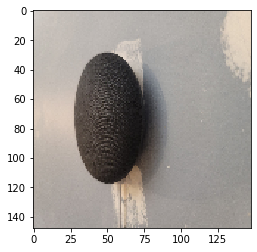

It is NOT a CAR 
 --------------------------------


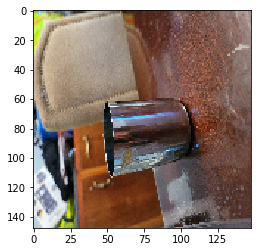

It is NOT a CAR 
 --------------------------------


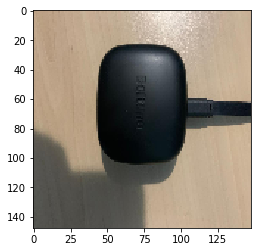

It is NOT a CAR 
 --------------------------------


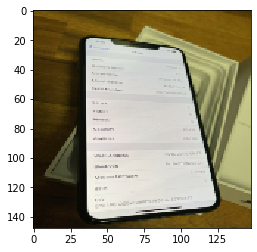

It is a CAR 
 --------------------------------


In [ ]:
datasetpath = 'C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/dataset folder/test_all'
directories = os.listdir(datasetpath)
for label in directories:
    img = image.load_img(datasetpath+ '/' + label , target_size=(148, 148))
   
    plot.imshow(img)
    plot.show()
    x = image.img_to_array(img)
    x=x/255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

 

    classes =model_2.predict(images)
    #print(classes)
    if classes > 0.5:
        print("It is a CAR \n --------------------------------")
    else:
        print("It is NOT a CAR \n --------------------------------")

In [ ]:
# Implementing Model 3

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',input_shape=(148,148,3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))



model_3.add(Conv2D(64,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.5))


model_3.add(Conv2D(128,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_3.add(Dropout(0.2))

model_3.add(BatchNormalization())





model_3.add(Flatten())


model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))



model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history_3 = model_3.fit(
      Aug_train_generator,  
      epochs=30,
      validation_data = Aug_validation_generator)

Epoch 1/30
309/309 [==============================] - 85s 274ms/step - loss: 0.6885 - accuracy: 0.8067 - val_loss: 0.0014 - val_accuracy: 0.7667
Epoch 2/30
309/309 [==============================] - 88s 284ms/step - loss: 0.2522 - accuracy: 0.9080 - val_loss: 4.7403e-04 - val_accuracy: 0.6000
Epoch 3/30
309/309 [==============================] - 87s 282ms/step - loss: 0.1750 - accuracy: 0.9372 - val_loss: 4.0114e-04 - val_accuracy: 0.7667
Epoch 4/30
309/309 [==============================] - 87s 283ms/step - loss: 0.1557 - accuracy: 0.9477 - val_loss: 12.4021 - val_accuracy: 0.7333
Epoch 5/30
309/309 [==============================] - 88s 285ms/step - loss: 0.1287 - accuracy: 0.9623 - val_loss: 2.1512e-04 - val_accuracy: 0.5333
Epoch 6/30
309/309 [==============================] - 87s 282ms/step - loss: 0.1295 - accuracy: 0.9583 - val_loss: 1.9943e-06 - val_accuracy: 0.8333
Epoch 7/30
309/309 [==============================] - 87s 282ms/step - loss: 0.1150 - accuracy: 0.9575 - val_loss

In [ ]:
# Test 
score_3 = model_3.evaluate(test_generator, verbose=1)
print('\n''Test accuracy:', score_3[1]) 

30/30 [==============================] - 1s 47ms/step

Test accuracy: 0.7666666507720947


### Tuning Hyperparameters

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV 


In [ ]:
# create a matrix to flatten all the values

X_train_aug = []
Y_train_aug = []

In [ ]:

Train_Data_Car_path_aug = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/car"
Train_Data_Not_car_path_aug = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_train/Not_car"

listingCar_aug = os.listdir(Train_Data_Car_path_aug)
for file in listingCar_aug:    
    img = Image.open(Train_Data_Car_path_aug+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_train_aug.append(x)
    Y_train_aug.append(1) # CAR


listingCar_aug_not_car = os.listdir(Train_Data_Not_car_path_aug)
for file in listingCar_aug_not_car:    
    img = Image.open(Train_Data_Not_car_path_aug+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_train_aug.append(x)
    Y_train_aug.append(0) #Not_CAR


In [ ]:
print('X_train data size is : {}'.format(len(X_train_aug)))

print('y_Train data size is : {}'.format(len(Y_train_aug)))


# ......................... Train Data Reshaping .......................
total_input = len(X_train_aug)
print("Total Train Data : %d" %total_input)

X_train_aug = np.array(X_train_aug)
X_train_aug = X_train_aug.reshape(total_input, row, column, 3) 
X_train_aug = X_train_aug.astype('float32')     
X_train_aug /= 255 
Y_train_aug = np.array(Y_train_aug)   
Y_train_aug = Y_train_aug.reshape(total_input, 1)   


print("X_train_aug shape")
print(X_train_aug.shape)
print("Y_train_aug Shape")
print(Y_train_aug.shape)





X_train data size is : 2468
y_Train data size is : 2468
Total Train Data : 2468
X_train_aug shape
(2468, 148, 148, 3)
Y_train_aug Shape
(2468, 1)


In [ ]:
# create a matrix to flatten all the values

X_val_aug = []
Y_val_aug = []

In [ ]:
val_Data_Car_path_aug = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_val/car"
val_Data_Not_car_path_aug = "C:/Users/Charan/Desktop/DAB300/LABS/Lab 3/Dataset folder/Augmented_val/Not_car"

listingCar_aug_val = os.listdir(val_Data_Car_path_aug)
for file in listingCar_aug_val:    
    img = Image.open(val_Data_Car_path_aug+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_val_aug.append(x)
    Y_val_aug.append(1) # CAR


listingCar_aug_not_car_val = os.listdir(val_Data_Not_car_path_aug)
for file in listingCar_aug_not_car_val:    
    img = Image.open(val_Data_Not_car_path_aug+ '/'+ file)
    #print(img)
    resizeImg=img.resize((row,column))
    a=resizeImg.convert('RGB')
    x = img_to_array(a)
    X_val_aug.append(x)
    Y_val_aug.append(0) #Not_CAR

In [ ]:
'''
# For counting uniwue values in a List

values, counts = np.unique(w, return_counts=True)


'''

'\n# For counting uniwue values in a List\n\nvalues, counts = np.unique(w, return_counts=True)\n\n\n'

In [ ]:


def create_model(learn_rate=0.1):

   

    model_5 = Sequential()

    model_5.add(Conv2D(4, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',input_shape=(148,148,3)))
    model_5.add(MaxPooling2D(pool_size=(2, 2)))


    model_5.add(Conv2D(8,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
    model_5.add(MaxPooling2D(pool_size=(2, 2)))
  

    model_5.add(Conv2D(12,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
    
    model_5.add(BatchNormalization())
   

    model_5.add(Flatten())

    
    model_5.add(Dense(20, activation='relu'))

    model_5.add(Dense(1, activation='sigmoid'))


    optimizer = Adam(learning_rate=learn_rate)
    model_5.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    return model_5


model_tun = KerasClassifier(build_fn=create_model, epochs=15, batch_size=16, verbose=0)


learn_rate = [0.001,0.01, 0.1,1,10,100]
 # We are declaring values in a list for optimizers to test

param_grid = dict(learn_rate=learn_rate)

grid = RandomizedSearchCV(estimator=model_tun, param_distributions=param_grid, cv=3)

grid_result = grid.fit(X_train_aug, Y_train_aug)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Charan\.conda\envs\DAB300_fall\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best: 0.496152 using {'learn_rate': 0.01}
0.162819 (0.230261) with: {'learn_rate': 0.001}
0.496152 (0.408285) with: {'learn_rate': 0.01}
0.170514 (0.241144) with: {'learn_rate': 0.1}
0.170514 (0.241144) with: {'learn_rate': 1}
0.162819 (0.230261) with: {'learn_rate': 10}
0.496152 (0.408285) with: {'learn_rate': 100}


In [ ]:
# Seems like SGB is best optimizer. 

In [ ]:
model_5 = Sequential()

model_5.add(Conv2D(4, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal',input_shape=(148,148,3)))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Dropout(0.5))

model_5.add(Conv2D(8,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
  

model_5.add(Conv2D(12,kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
    
#model_5.add(BatchNormalization())
model_5.add(Dropout(0.2)) 

model_5.add(Flatten())
    
model_5.add(Dense(20, activation='relu'))

model_5.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.01 )
model_5.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    

In [ ]:
history_5 = model_5.fit(
      X_train_aug,Y_train_aug,  
      epochs=15,batch_size=8,
      validation_data = (X_val,Y_val))

Train on 2468 samples, validate on 30 samples
Epoch 1/15
2468/2468 [==============================] - 23s 9ms/step - loss: 0.6947 - accuracy: 0.4992 - val_loss: 0.8813 - val_accuracy: 0.5000
Epoch 2/15
2468/2468 [==============================] - 28s 11ms/step - loss: 0.6952 - accuracy: 0.4964 - val_loss: 0.8787 - val_accuracy: 0.5000
Epoch 3/15
2468/2468 [==============================] - 28s 11ms/step - loss: 0.6947 - accuracy: 0.4939 - val_loss: 0.9245 - val_accuracy: 0.5000
Epoch 4/15
2468/2468 [==============================] - 27s 11ms/step - loss: 0.6943 - accuracy: 0.5008 - val_loss: 0.8903 - val_accuracy: 0.5000
Epoch 5/15
2468/2468 [==============================] - 27s 11ms/step - loss: 0.6945 - accuracy: 0.5016 - val_loss: 0.9083 - val_accuracy: 0.5000
Epoch 6/15
2468/2468 [==============================] - 29s 12ms/step - loss: 0.6939 - accuracy: 0.5118 - val_loss: 0.8870 - val_accuracy: 0.5000
Epoch 7/15
2468/2468 [==============================] - 28s 11ms/step - loss: 0